## Practice Case : MotoGP Dataset

## 1. Import Libraries and Load data

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import os
import pickle

Using TensorFlow backend.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2.1 Load Fungsi Bantuan

In [0]:
# load fungsi pembantu
import sys
sys.path.append('/content/gdrive/My Drive/module/ngodingpython')
from helpers import load_image_directory, plot_graph

In [0]:
from sklearn.model_selection import GridSearchCV

## 2.2 Buat CNN Architecture

In [0]:
class MyModel:
	@staticmethod
	def build(width, height, depth, classes):
		# inisialisasi model dengan konfigurasi
		# "channel last"
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# make sure channel first tetap jalan
		if K.image_data_format() == 'channel_first':
			inputShape = (depth, height, width)
			chanDim = 1

		# layer
		model.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (96, 96, 3)))
		model.add(MaxPooling2D((2,2), strides=(2,2)))

		model.add(tf.keras.layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
		model.add(MaxPooling2D((2,2), strides=(2,2)))
	
		model.add(tf.keras.layers.Conv2D(256, kernel_size = (3, 3), activation = 'relu'))
		model.add(MaxPooling2D((2,2), strides=(2,2)))
	
		model.add(tf.keras.layers.Conv2D(512, kernel_size = (3, 3), activation = 'relu'))
		model.add(MaxPooling2D((2,2), strides=(2,2)))

		model.add(tf.keras.layers.Flatten())
		model.add(tf.keras.layers.Dense(128, activation = 'relu'))
		model.add(tf.keras.layers.Dense(64, activation = 'relu'))
		model.add(Dropout(0.2))	

		# output
		model.add(tf.keras.layers.Dense(6, activation = 'softmax'))

		model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

		return model


In [0]:
# Definisikan path dataset dan tempat menyimpan model
BASE = '/content/gdrive/My Drive/'
dataset = BASE + 'data/dataset_motogp/'
model_path = BASE + 'tempat_simpan_model.pkl' # tempat menyimpan model
labelbin = BASE + 'tempat_simpan_label.pkl'

In [0]:
#  hyperparameter
EPOCHS = 150
INIT_LR = 0.001
BS = 50
IMAGE_DIMS = (96, 96, 3) # 3 items (W, H, D)

## 3. Inisiasi Data

In [0]:
# inisialisasi list data dan label
data, labels = load_image_directory(dataset, IMAGE_DIMS)

In [10]:
# Normalisasi data
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("[INFO] data matriks: {:2f}MB".format(
    data.nbytes/ (1024 * 1000.0)))

[INFO] data matriks: 87.696000MB


In [0]:
# binarisasi label
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [0]:
# train-test-split
(trainX, testX, trainY, testY) = train_test_split(data,
    labels, test_size=0.2, random_state=42)

In [0]:
# konstruksi ImageGenerator
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

In [14]:
# inisialisasi model
print("[INFO] Mengcompile Jaringan")
model = MyModel.build(width=IMAGE_DIMS[1], 
    height=IMAGE_DIMS[0], depth=IMAGE_DIMS[2], 
    classes=len(lb.classes_))
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] Mengcompile Jaringan
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
# latih jaringan
print("[INFO] Melatih Jaringan")
H = model.fit_generator(
    aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS, verbose=1)

[INFO] Melatih Jaringan
Epoch 1/150
6/6 [==============================] - 4s 611ms/step - loss: 1.8188 - acc: 0.1606 - val_loss: 1.7972 - val_acc: 0.1341
Epoch 2/150
6/6 [==============================] - 1s 153ms/step - loss: 1.7616 - acc: 0.2153 - val_loss: 1.7647 - val_acc: 0.2683
Epoch 3/150
6/6 [==============================] - 1s 154ms/step - loss: 1.7359 - acc: 0.2300 - val_loss: 1.6991 - val_acc: 0.1951
Epoch 4/150
6/6 [==============================] - 1s 162ms/step - loss: 1.5918 - acc: 0.3065 - val_loss: 2.0898 - val_acc: 0.1463
Epoch 5/150
6/6 [==============================] - 1s 134ms/step - loss: 1.3625 - acc: 0.4161 - val_loss: 1.6133 - val_acc: 0.3049
Epoch 6/150
6/6 [==============================] - 1s 160ms/step - loss: 1.3620 - acc: 0.3833 - val_loss: 1.4369 - val_acc: 0.3049
Epoch 7/150
6/6 [==============================] - 1s 140ms/step - loss: 1.2925 - acc: 0.3650 - val_loss: 1.1771 - val_acc: 0.4024
Epoch 8/150
6/6 [==============================] - 1s 151ms

In [0]:
# menyimpan model
print("[INFO] Menyimpan Model Kedalam Disk")
model.save(model_path)

In [0]:
# menyimpan label binary
print("[INFO] Menyimpan Label Binary")
f = open(labelbin, 'wb')
f.write(pickle.dumps(lb))
f.close()

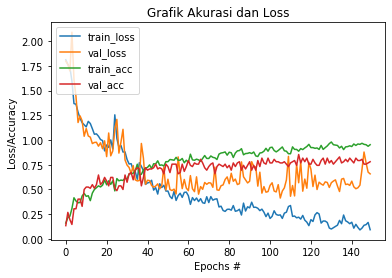

In [18]:
# plot akurasi
plot_graph(H, EPOCHS)

# Test model

### TEST 1

In [0]:
# Load Gambar
import matplotlib.image as mpimg
image_test = BASE + 'marc-marquez-valentino-rossi.jpg'
image_show = mpimg.imread(image_test)
image = load_img(image_test, target_size=(96, 96))

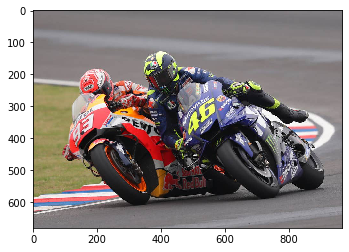

In [20]:
plt.imshow(image_show)

In [0]:
# pra proses
image = np.array(image, dtype="float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [22]:
# klasifikasi input
print('[INFO] Mencari Kelas Gambar')
proba = model.predict(image)[0]
idx = np.argmax(proba)
label = lb.classes_[idx]

[INFO] Mencari Kelas Gambar


In [23]:
# prediksi label + confidence score
label = "{}: {:.2f}%".format(label, proba[idx] * 100)
print(label)

marquez: 89.97%


### TEST 2

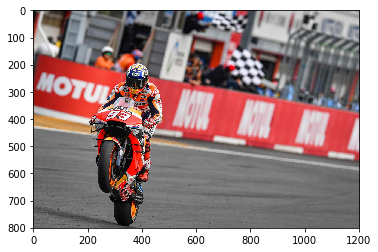

In [24]:
# Load Gambar
import matplotlib.image as mpimg
image_test = BASE + 'rositest1.jpg'
image_show = mpimg.imread(image_test)
image = load_img(image_test, target_size=(96, 96))
plt.imshow(image_show)

In [25]:
# pra proses
image = np.array(image, dtype="float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# klasifikasi input
print('[INFO] Mencari Kelas Gambar')
proba = model.predict(image)[0]
idx = np.argmax(proba)
label = lb.classes_[idx]

# prediksi label + confidence score
label = "{}: {:.2f}%".format(label, proba[idx] * 100)
print(label)

[INFO] Mencari Kelas Gambar
lorenzo: 99.78%


### TEST 3

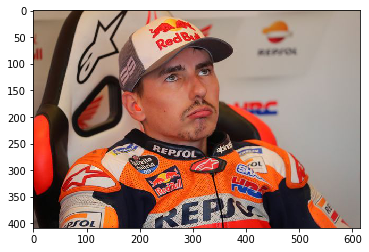

In [26]:
# Load Gambar
import matplotlib.image as mpimg
image_test = BASE + 'lorenzo.jpg'
image_show = mpimg.imread(image_test)
image = load_img(image_test, target_size=(96, 96))
plt.imshow(image_show)

In [27]:
# pra proses
image = np.array(image, dtype="float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# klasifikasi input
print('[INFO] Mencari Kelas Gambar')
proba = model.predict(image)[0]
idx = np.argmax(proba)
label = lb.classes_[idx]

# prediksi label + confidence score
label = "{}: {:.2f}%".format(label, proba[idx] * 100)
print(label)

[INFO] Mencari Kelas Gambar
lorenzo: 94.97%
